In [ ]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

In [ ]:
import tensorflow as tf
import numpy as np
import time
import os
from tensorflow import keras

#### MNIST dataset

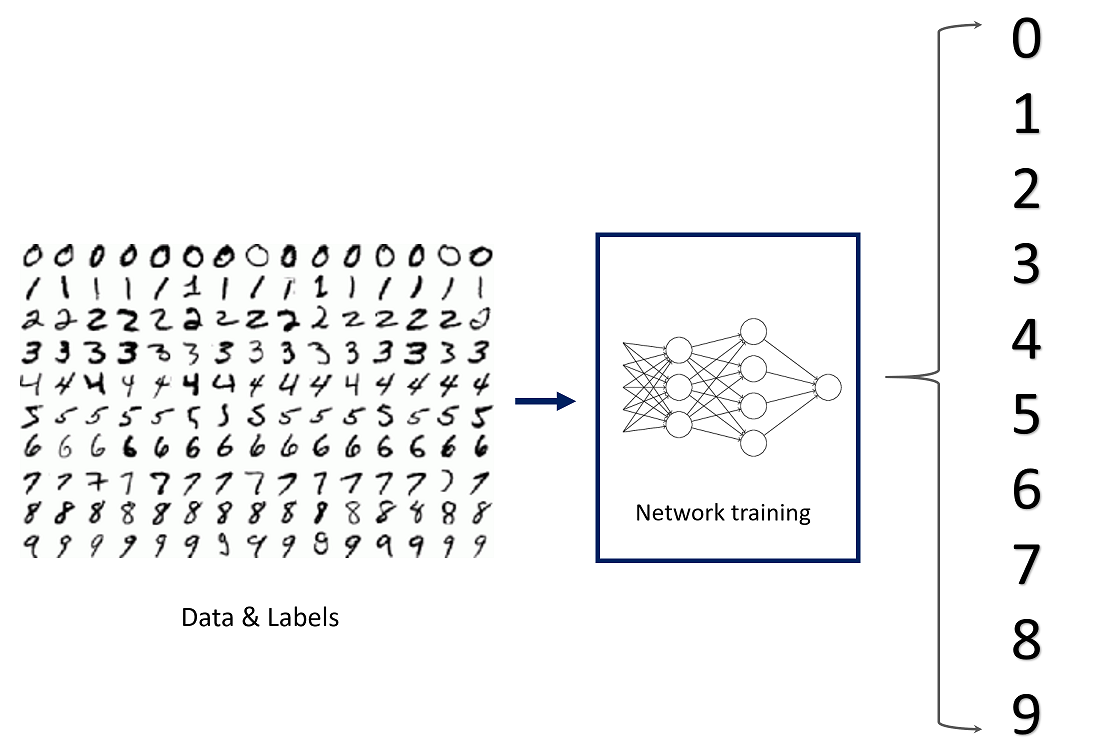

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)

val_x = train_x[:5000]
val_y = train_y[:5000]

In [ ]:
import matplotlib.pyplot as plt

# Image visualization
n = 5
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(12, 12))
for i in range(n**2):
    ax = axs[i // n, i % n]
    (-train_x[i]+1)/2
    ax.imshow((-train_x[i, :, :, 0] + 1)/2, cmap=plt.cm.gray)
    # ax.axis('off')
plt.tight_layout()
plt.show()

# Image processing with DNN

In [ ]:
model_dnn = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_dnn.summary()

In [ ]:
model_dnn.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model_dnn.fit(train_x, train_y, epochs=5)
model_dnn.evaluate(test_x, test_y)

In [ ]:
pred_y = model_dnn.predict(test_x)
display((pred_y[0], test_y[0]))

In [ ]:
# [np.argmax(pred), actual for pred, actual in list(zip(pred_y, test_y))]
for pred, actual in list(zip(pred_y, test_y)):
    print(np.argmax(pred), actual)

# Image processing with CNN (LeNet)
Based on https://github.com/RichmondAlake/tensorflow_2_tutorials/blob/master/13_lenet-5.ipynb

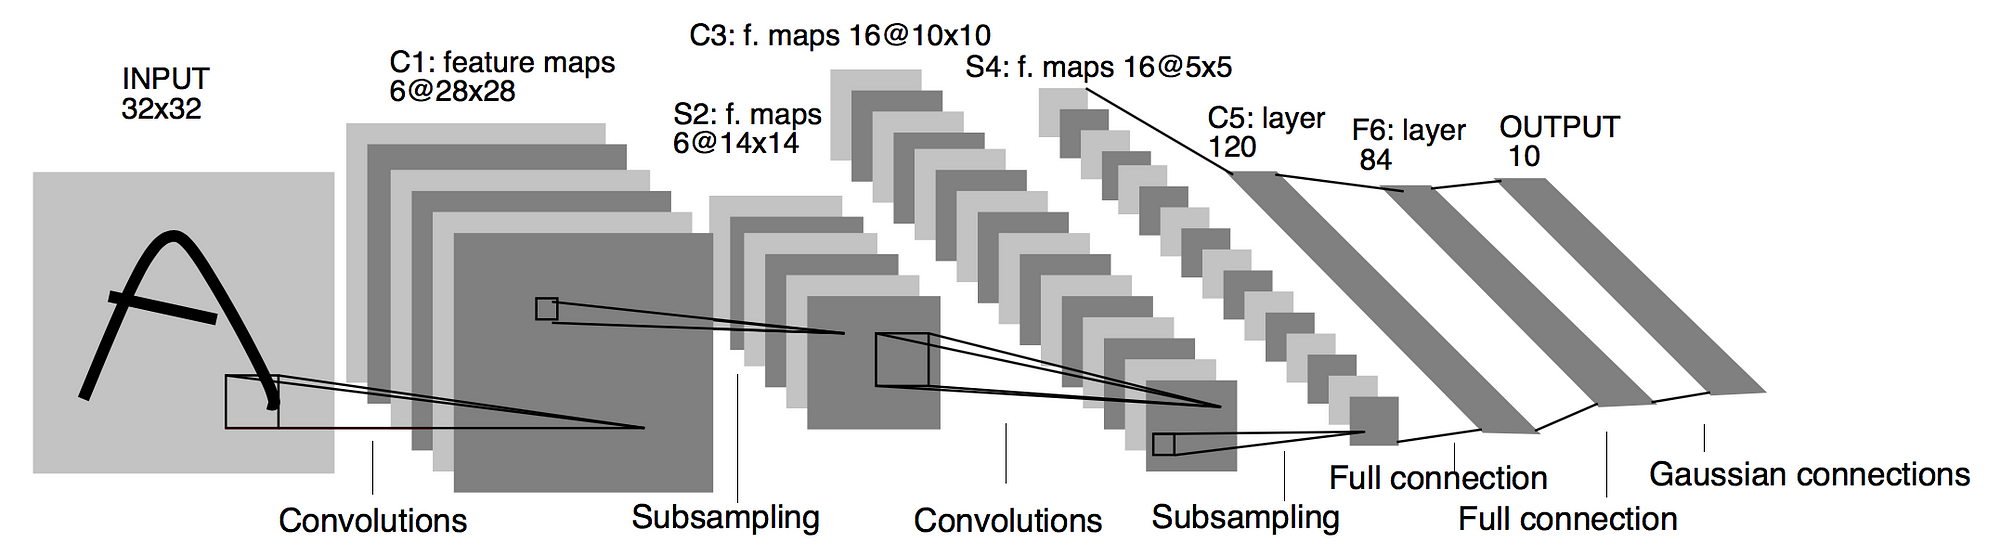

#### LeNet (1990) model

In [ ]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='tanh'),
    keras.layers.Dense(84, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])

lenet_5_model.summary()
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

#### Training and Evaluation

In [ ]:
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

root_logdir = os.path.join(os.curdir, "logs\\fit\\")
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

lenet_5_model.fit(train_x, 
                  train_y, 
                  epochs=15, 
                  validation_data=(val_x, val_y), 
                  callbacks=[tensorboard_cb]
                 )
lenet_5_model.evaluate(test_x, test_y)

## Useful URLs

TensorFlow - Python Deep Learning Neural Network API https://deeplizard.com/learn/video/RznKVRTFkBY